In [1]:
import cv2 as cv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier 
from skimage.feature import hog
import glob
from sklearn.model_selection import train_test_split
import os
import colorsys

Original


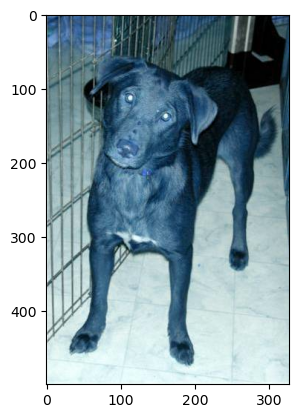

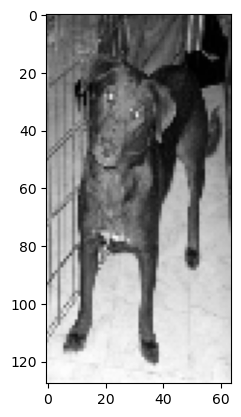

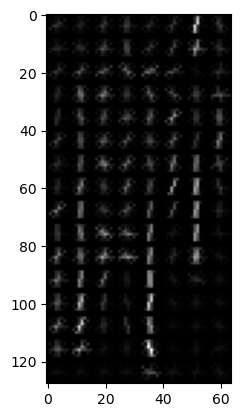

In [2]:
import cv2

imgs = np.array(cv.imread('Kaggle_Clean/training_set/training_set/dogs/dog.1.jpg'))
#imgs = cv.cvtColor(imgs, cv.COLOR_BGR2RGB)

gray = cv.cvtColor(imgs, cv.COLOR_RGB2GRAY)
resize_gray = cv.resize(gray,(64,128))
feature , hog_img= hog(resize_gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)

#hsv = cv.cvtColor(imgs, cv.COLOR_BGR2HSV)

print('Original')
plt.imshow(imgs)
plt.show()
plt.imshow(resize_gray, cmap="gray")
plt.show() 
plt.imshow(hog_img,cmap="gray")
plt.show() 




In [3]:
from collections import defaultdict

X = []
y = []
# cat:0, dog:1

def toDict(file_name,classes,length,widht,d,r=0,g=0,b=0):
    df_dict['file_name'].append(file_name)
    df_dict['length'].append(length)
    df_dict['widht'].append(widht)
    df_dict['resolution'].append(length*widht)
    df_dict['dimension'].append(d)
    df_dict['classes'].append(classes)

def resize_image(x):
    imgs = np.array(cv.imread(x))
    resize_img = cv.resize(imgs,(64,128))
    gray = cv.cvtColor(resize_img, cv.COLOR_RGB2GRAY)
    feature , hog_img = hog(gray, pixels_per_cell=(8, 8),cells_per_block=(2, 2),visualize=True)
    return feature

df_dict = defaultdict(list)
# Cat Traning Data
for i, cat in enumerate(glob.glob('Kaggle_Clean/training_set/training_set/cats/cat.*.jpg')):
    if i <2000:
        classes = 0
            # Store file name
        file_path = cat
        file_name = os.path.basename(file_path)
            # read image
        imgs = np.array(cv.imread(cat))
        length, widht, d = imgs.shape
        # append info. into dictionary 
        toDict(file_name,classes,length,widht,d)
        # Feature Extract and Append into list
        feature = resize_image(cat)
        X.append(feature)
        y.append(0)
    else:
        break
# Cat Testing Data
for i, cat in enumerate(glob.glob('Kaggle_Clean/test_set/test_set/cats/cat.*.jpg')):
    if i <500:
        classes = 0
            # Store file name
        file_path = cat
        file_name = os.path.basename(file_path)
            # read image
        imgs = np.array(cv.imread(cat))
        length, widht, d = imgs.shape
            # append info. into dictionary
        toDict(file_name,classes,length,widht,d)
            # Feature Extract and Append into list
        feature = resize_image(cat)
        X.append(feature)
        y.append(0)
    else:
        break
# Dog Traning Data
for i, dog in enumerate(glob.glob('Kaggle_Clean/training_set/training_set/dogs/dog.*.jpg')):
    if i <2000:
        classes = 1
        # Store file name
        file_path = dog
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(dog))
        length, widht, d = imgs.shape
        # append info. into dictionary
        toDict(file_name,classes,length,widht,d)
        # Feature Extract and Append into list
        feature = resize_image(dog)
        X.append(feature)
        y.append(1)
    else:
        break
# Dog Testing Data
for i, dog in enumerate(glob.glob('Kaggle_Clean/test_set/test_set/dogs/dog.*.jpg')):
    if i <500:
        classes = 1
        # Store file name
        file_path = dog
        file_name = os.path.basename(file_path)
        # read image
        imgs = np.array(cv.imread(dog))
        length, widht, d = imgs.shape
        # append info. into dictionary
        toDict(file_name,classes,length,widht,d)
        # Feature Extract and Append into list
        feature = resize_image(dog)
        X.append(feature)
        y.append(1)
    else:
        break  

In [9]:
df = pd.DataFrame.from_dict(df_dict)

In [10]:
df.describe()

,length,widht,resolution,dimension,classes
count,5000.000000,5000.000000,5000.00000,5000.0,5000.00000
mean,360.914400,403.650000,151338.60740,3.0,0.50000
std,98.275077,109.730248,60871.83954,0.0,0.50005
min,33.000000,59.000000,2419.00000,3.0,0.00000
25%,300.000000,320.750000,104641.25000,3.0,0.00000
50%,374.000000,447.000000,173159.50000,3.0,0.50000
75%,427.000000,499.000000,187125.00000,3.0,1.00000
max,768.000000,1050.000000,785664.00000,3.0,1.00000


In [18]:
df[df['resolution'] < 15000].count()

file_name     44
length        44
widht         44
resolution    44
dimension     44
classes       44
dtype: int64

Text(0, 0.5, 'Number of images')

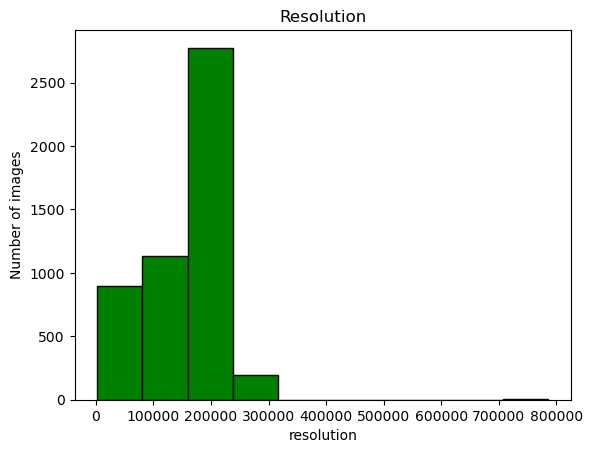

In [11]:
df['resolution'].plot(kind="hist",color = 'green', edgecolor = 'black')
plt.title("Resolution")
plt.xlabel("resolution")
plt.ylabel("Number of images")

Text(0, 0.5, 'Number of images')

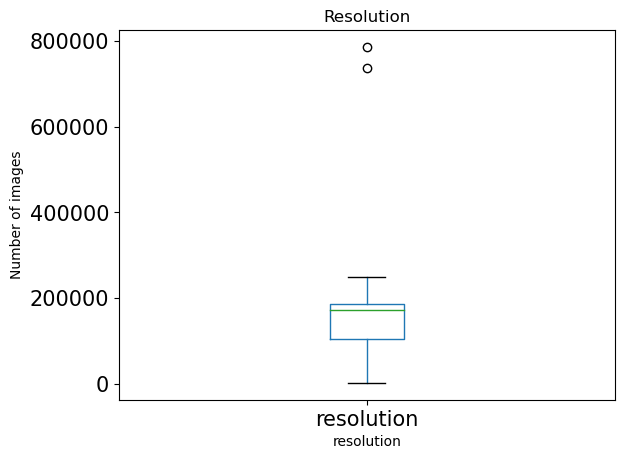

In [12]:
boxplot = df.boxplot(column = 'resolution', grid=False, fontsize=15)  
plt.title("Resolution")
plt.xlabel("resolution")
plt.ylabel("Number of images")

In [ ]:
df2 = df.groupby(['classes'])['classes'].count()
print(df2)
df2.plot(kind="bar",color = ('green','pink'))
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Class")
plt.xlabel("class")
plt.ylabel("Number of images")